# ME 592 HW2 - Problem 2

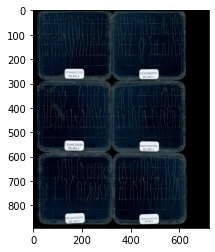

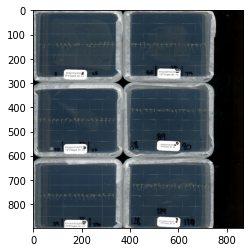

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color

# Load the two images
img1 = cv2.imread('1.jpg')
img1.shape
img2 = cv2.imread('2.jpg')
img2.shape

#Convert from cv2 BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# #Show the images in separate windows, then close them
# cv2.imshow('Image 1', img1)
# cv2.imshow('Image 2', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#Create output figures of the resulting images
plt.figure("Original 1.jpg")
plt.imshow(img1)
plt.figure("Original 2.jpg")
plt.imshow(img2)
plt.show()

In [2]:
#Shape of raw image '1.jpg'
img1.shape

(892, 720, 3)

In [3]:
#Shape of raw image '2.jpg'
img2.shape

(898, 869, 3)

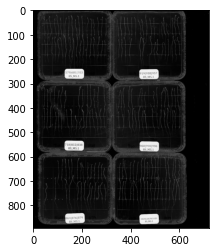

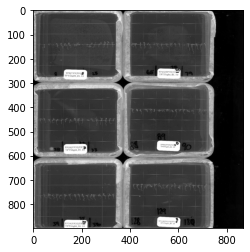

In [4]:
#Pre-process the images
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# #Show the images in separate windows, then close them
# cv2.imshow('Image 1', img1_gray)
# cv2.imshow('Image 2', img2_gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#Create output figures of the resulting images
plt.figure("Grayscale 1.jpg")
plt.imshow(img1_gray, cmap = 'gray')
plt.figure("Grayscale 2.jpg")
plt.imshow(img2_gray, cmap = 'gray')
plt.show()

40.0
80.0


<Figure size 432x288 with 0 Axes>

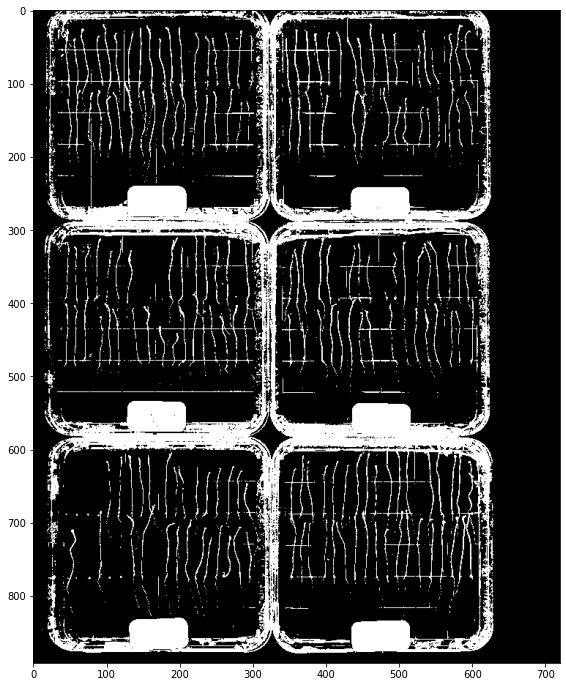

<Figure size 432x288 with 0 Axes>

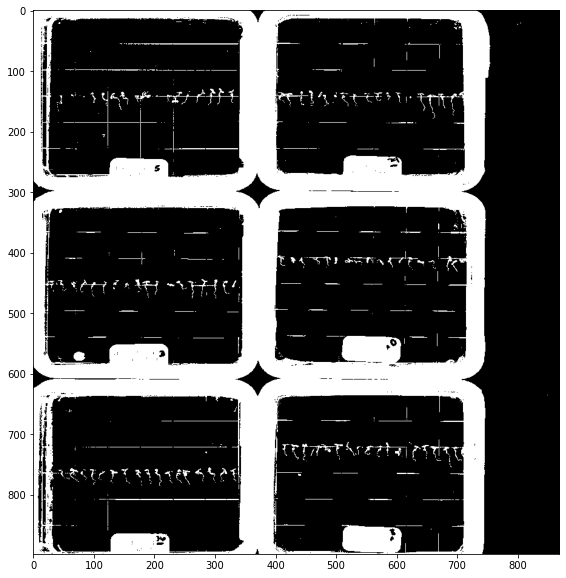

In [5]:
# Threshold the images
ret1, img1_thresh = cv2.threshold(img1_gray, 40, 255, cv2.THRESH_BINARY) #+ cv2.THRESH_OTSU)
ret2, img2_thresh = cv2.threshold(img2_gray, 80, 255, cv2.THRESH_BINARY) #+ cv2.THRESH_OTSU)
#Could replate OTSU with TRIANGLE but results seem better with OTSU or just manual thresholding
print(ret1)
print(ret2)

# #Show the images, then close them
# cv2.imshow('Image 1', img1_thresh)
# cv2.imshow('Image 2', img2_thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#Create output figures of the resulting images and scale to fit screen better
plt.figure("Threshold 1.jpg")
plt.figure(figsize=(10,12))
plt.imshow(img1_thresh, cmap = 'gray')
plt.figure("Threshold 2.jpg")
plt.figure(figsize=(10,10))
plt.imshow(img2_thresh, cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 432x288 with 0 Axes>

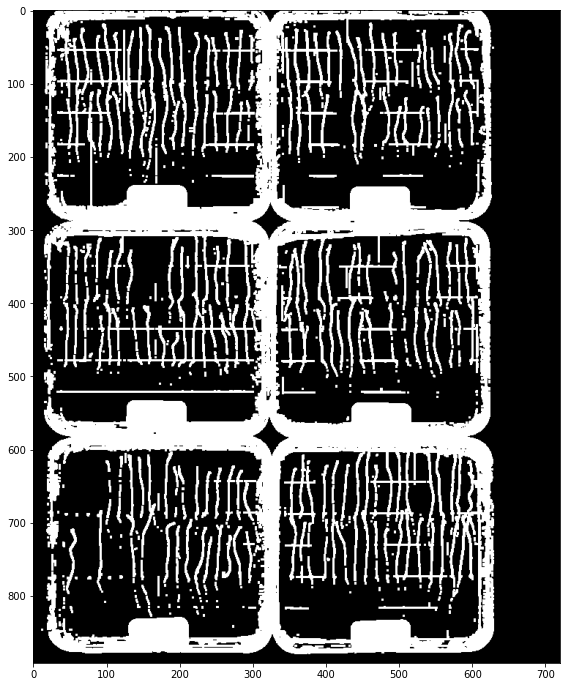

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

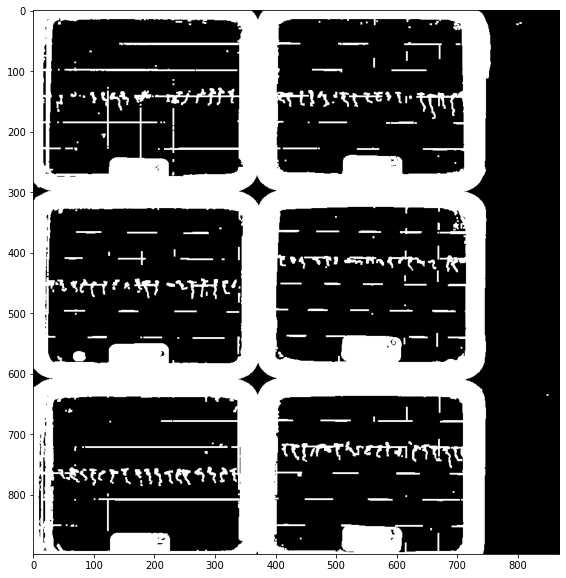

In [11]:
#Perform morphological operations to remove small or noisy objects
kernel = np.ones((3, 3), np.uint8)
erosion1 = cv2.erode(img1_thresh, kernel, iterations=1)
dilation1 = cv2.dilate(img1_thresh, kernel, iterations=1)

erosion2 = cv2.erode(img2_thresh, kernel, iterations=1)
dilation2 = cv2.dilate(img2_thresh, kernel, iterations=1)
                       
# Create output figures of the resulting images and scale to fit screen better
plt.figure("Erosion 1.jpg")
plt.figure(figsize=(12,12))
# plt.imshow(erosion1, cmap = 'gray')
plt.figure("Dilation 1.jpg")
plt.figure(figsize=(12,12))
plt.imshow(dilation1, cmap = 'gray')

plt.figure("Erosion 2.jpg")
plt.figure(figsize=(10,10))
# plt.imshow(erosion2, cmap = 'gray')
plt.figure("Dilation 2.jpg")
plt.figure(figsize=(10,10))
plt.imshow(dilation2, cmap = 'gray')
plt.show()                     


<Figure size 432x288 with 0 Axes>

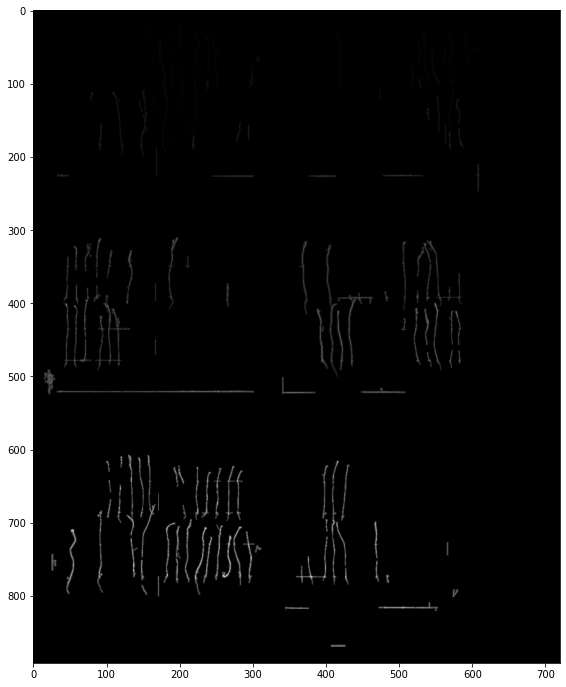

In [13]:
#SEGMENTING THE SEEDLINGS FROM IMAGE 1:
# Define kernel for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Apply connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilation1)

#Remove background objects: Doing this based on size & shape

min_size = 50    #Adjust minimum size (pixel area) of objects
max_size = 1000   #Adjust maximum size (pixel area) of objects

cleaned_labels = np.copy(labels)

#Loop over all objects and remove background objects based on size
for i in range(1, num_labels):
    #Check if object is too small or too large
    if stats[i, cv2.CC_STAT_AREA] < min_size or stats[i, cv2.CC_STAT_AREA] > max_size:
        #Set object pixels to background
        cleaned_labels[labels == i] = 0
            
#Apply cleaned labels to grayscale images
img1_clean = cleaned_labels * img1_gray

# Create output figures of the resulting images and scale to fit screen better
plt.figure("Cleaned 1.jpg")
plt.figure(figsize=(12,12))
plt.imshow(img1_clean, cmap = 'gray')


<Figure size 432x288 with 0 Axes>

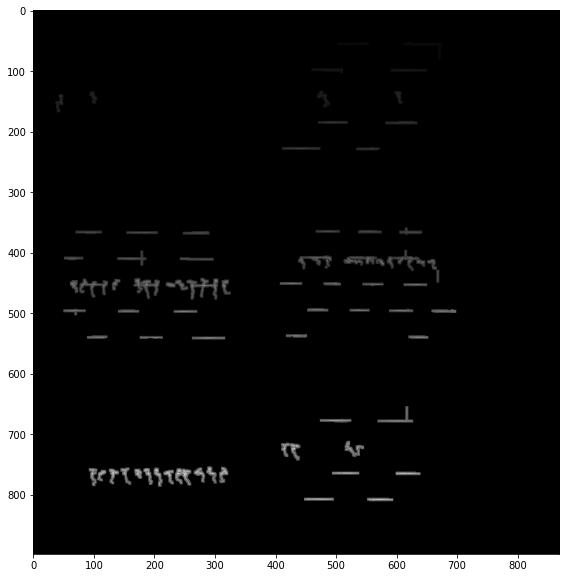

In [8]:
#SEGMENTING THE SEEDLINGS FROM IMAGE 2:
# Define kernel for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Apply connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilation2)

#Remove background objects: Doing this based on size & shape

min_size = 150    #Adjust minimum size (pixel area) of objects
max_size = 1000   #Adjust maximum size (pixel area) of objects

cleaned_labels = np.copy(labels)

#Loop over all objects and remove background objects based on size
for i in range(1, num_labels):
    #Check if object is too small or too large
    if stats[i, cv2.CC_STAT_AREA] < min_size or stats[i, cv2.CC_STAT_AREA] > max_size:
        #Set object pixels to background
        cleaned_labels[labels == i] = 0
            
#Apply cleaned labels to grayscale images
img2_clean = cleaned_labels * img2_gray

# Create output figures of the resulting images and scale to fit screen better
plt.figure("Cleaned 2.jpg")
plt.figure(figsize=(10,10))
plt.imshow(img2_clean, cmap = 'gray')